# 데이터 로드
데이터 점검을 위해 2022년 3월 1~31일 원장데이터 불러옴 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
# sns.set(rc = {'figure.figsize':(15,8), 'font.serif': font_name})

In [3]:
import pandas as pd
df = pd.read_csv('sample.csv', encoding='euckr')
df.ITEM_NM = df.ITEM_NM.apply(lambda x: x.strip()).apply(lambda x: x.replace('\u3000',''))
df

,CMP_CD,STOR_CD,SALE_DT,TRADE_NO,ITEM_PLU_CD,STORE_NM,ITEM_NM,ITEM_TYPE,고객번호,PAY_GNDR_DIV,PAY_AGE,SUM(TSD.SALE_QTY),SUM(TSD.SALE_AMT)
0,BRKR,11235,20220301,11,N80012,까치산역,하프갤론,2.0,0,,0,1,29000
1,BRKR,11235,20220301,40,A56075,까치산역,체다치즈 앤 포테이토,30.0,1010409633NYH,2,31,1,0
2,BRKR,11235,20220301,40,N80004,까치산역,더블레귤러컵,2.0,1010409633NYH,2,31,1,6700
3,BRKR,11432,20220301,32,A51872,오산운암,바람과함께사라지다,30.0,1006188743NNH,2,37,1,0
4,BRKR,11445,20220301,89,N88306,서현로데오,블록팩(엄마는외계인),NaN,0,2,30,1,3600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7865346,BRKR,72236,20220331,39,A50410,제천강저,체리쥬빌레,30.0,1006531055NNH,2,38,1,0
7865347,BRKR,72236,20220331,57,A56077,제천강저,New 슈팅스타,30.0,0,,0,1,0
7865348,BRKR,72236,20220331,62,A51940,제천강저,엄마는 외계인,30.0,NaN,,0,2,0
7865349,BRKR,74150,20220331,16,N80012,센텀홈플러스,하프갤론,2.0,1008726618NNH,2,46,1,29000


In [4]:
df.ITEM_TYPE.unique()

array([ 2., 30., nan,  6., 10., 85., 20., 80., 40.])

In [5]:
tp = pd.read_csv('type.csv', encoding='euckr')
tp.iloc[:,2:5]

,CMM_CD,LANG_TYPE,ENTRY_NM
0,10,ko-KR,제품
1,20,ko-KR,상품
2,30,ko-KR,BR_I/C
3,40,ko-KR,BR_Cake
4,41,ko-KR,타핑
5,50,ko-KR,test
6,80,ko-KR,BR_디저트
7,81,ko-KR,우유
8,90,ko-KR,장비
9,51,ko-KR,드라이


In [6]:
df.ITEM_TYPE.unique()

array([ 2., 30., nan,  6., 10., 85., 20., 80., 40.])

In [7]:
len(df[df.ITEM_TYPE.isna()].ITEM_NM.unique()) # 564개 아이템이 타입관리가 되지 않고 있음

926

In [8]:
# ITEM_TYPE 카테고리로 집계되지 않은 항목 조회
df[df.ITEM_TYPE.isna()].ITEM_NM.unique() # 블록팩, 레디팩, 케익, 음료 등 다양한 카테고리의 상품이 관리되지 않고 있음

array(['블록팩(엄마는외계인)', 'KT더블할인_파인트', '컵_이달의맛더블주니어', '이상한나라의솜사탕',
       '아이스 모찌 스트로베리', '블록팩(초콜릿무스)', '스틱바 초코그린티', '제주 감귤 아이스 모찌', '#HBD초',
       '카페라떼(I)[3.3]', '블록팩(이상한나라의솜사탕)', '아이스 모찌 그린티', '블록팩(슈팅스타)',
       '77_나눠먹는 와츄원(L2)', '(R)아몬드봉봉블라스트[5.4]', '레디팩(망고탱고)', '스틱바 민트쿠앤크',
       '아이스 모찌 크림치즈', '1번숫자초', '아이스호떡', '미니 아이스 모찌(VBS/GT/MG)',
       '레디팩(슈팅스타)', '핸드팩set', '블록팩 (쿠키앤크림)', '49_바로먹는 와츄원 (L1)',
       '와플레귤러콘(전용)', '레디팩 (트리플 민초)', '설향딸기블라스트[4.5]', '(R)밀크쉐이크[5.4]',
       '블록팩 (뉴욕치즈케이크)', '레디팩 (아몬드 봉봉)', '블록팩(아몬드봉봉)', '오레오쉐이크[5.4]',
       '52_스마일 스노우 블러섬(K2)', '카페라떼(H)[3.3]', '아이스마카롱 체리쥬빌레', '샷추가[0.5]',
       '아이스 모찌 초코바닐라', '블록팩(체리쥬빌레)', 'CB_하트송베어27cm(민트)', '아이스마카롱 쿠키앤크림',
       '연유라떼(I)[3.8]', '딸기연유라떼[5.1]', '(L)와츄원쉐이크NEWBI[6.2]',
       '콘_이달의맛더블주니어', '(L)밀크쉐이크[6.2]', '81_리얼 27 큐브', '(L)아메리카노(I)[3.5]',
       '아이스 모찌 콩고물', '레디팩 (끼리 크림치즈 앤 스트로베리)', '8번숫자초',
       '(R)와츄원쉐이크NEWBI[5.4]', '파티고깔모자(핑크)', '샤인머스캣블라스트[4.5]', '3번숫자초',
       '레디팩(로투스 비스코프)', '6번숫자초', '레디팩 (베리베리 

## 기본 DF

### 판매번호 만들기
기존의 판매번호는 매장별 일자별 인식 불가하며, 1번부터 차례대로 생성<br>
고유 판매번호생성을 통해, 제품관리 및 빠른 고객응대 가능<br>
예시> 점포고유번호(4)YYMMDD판매번호(4) : 일 9999개의 영수증 처리 가능 (CGV 기존방식)

In [9]:
# 고유판매번호 생성
df['TRADE_CD'] = df.STOR_CD.apply(lambda x: str(x)) + df.SALE_DT.apply(lambda x: str(x)[-6:]) +  df.TRADE_NO.apply(lambda x: str(x).rjust(4,"0"))
df.sort_values('TRADE_CD', ascending =True)

,CMP_CD,STOR_CD,SALE_DT,TRADE_NO,ITEM_PLU_CD,STORE_NM,ITEM_NM,ITEM_TYPE,고객번호,PAY_GNDR_DIV,PAY_AGE,SUM(TSD.SALE_QTY),SUM(TSD.SALE_AMT),TRADE_CD
4024158,BRKR,11081,20220301,1,A56087,청량리역사,아이스 로아커,30.0,0,,0,1,0,110812203010001
4024157,BRKR,11081,20220301,1,A56090,청량리역사,우연한 딸기,30.0,0,,0,1,0,110812203010001
92445,BRKR,11081,20220301,1,A50554,청량리역사,뉴욕치즈케이크,30.0,0,,0,1,0,110812203010001
3810357,BRKR,11081,20220301,1,N86947,청량리역사,연유라떼(H)[3.8],NaN,1007804279NNN,2,71,2,7600,110812203010001
3041957,BRKR,11081,20220301,1,N80009,청량리역사,파인트,2.0,0,,0,1,8900,110812203010001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369162,BRKR,74150,20220331,59,N80007,센텀홈플러스,싱글레귤러콘,2.0,1008278340YYH,2,37,1,3500,741502203310059
6266171,BRKR,74150,20220331,59,N80012,센텀홈플러스,하프갤론,2.0,1008278340YYH,2,37,1,29000,741502203310059
7496167,BRKR,74150,20220331,61,N80009,센텀홈플러스,파인트,2.0,1001662380NNH,2,48,1,8900,741502203310061
3318861,BRKR,74150,20220331,65,N80012,센텀홈플러스,하프갤론,2.0,1001341716NNH,2,48,1,29000,741502203310065


### 판매제품 별 이름 추출을 위한 작업

In [10]:
df

,CMP_CD,STOR_CD,SALE_DT,TRADE_NO,ITEM_PLU_CD,STORE_NM,ITEM_NM,ITEM_TYPE,고객번호,PAY_GNDR_DIV,PAY_AGE,SUM(TSD.SALE_QTY),SUM(TSD.SALE_AMT),TRADE_CD
0,BRKR,11235,20220301,11,N80012,까치산역,하프갤론,2.0,0,,0,1,29000,112352203010011
1,BRKR,11235,20220301,40,A56075,까치산역,체다치즈 앤 포테이토,30.0,1010409633NYH,2,31,1,0,112352203010040
2,BRKR,11235,20220301,40,N80004,까치산역,더블레귤러컵,2.0,1010409633NYH,2,31,1,6700,112352203010040
3,BRKR,11432,20220301,32,A51872,오산운암,바람과함께사라지다,30.0,1006188743NNH,2,37,1,0,114322203010032
4,BRKR,11445,20220301,89,N88306,서현로데오,블록팩(엄마는외계인),NaN,0,2,30,1,3600,114452203010089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7865346,BRKR,72236,20220331,39,A50410,제천강저,체리쥬빌레,30.0,1006531055NNH,2,38,1,0,722362203310039
7865347,BRKR,72236,20220331,57,A56077,제천강저,New 슈팅스타,30.0,0,,0,1,0,722362203310057
7865348,BRKR,72236,20220331,62,A51940,제천강저,엄마는 외계인,30.0,NaN,,0,2,0,722362203310062
7865349,BRKR,74150,20220331,16,N80012,센텀홈플러스,하프갤론,2.0,1008726618NNH,2,46,1,29000,741502203310016


In [9]:
# 사이즈별 제품을 신규 카데고리로 생성
target1 = ['싱글','더블','파인트','쿼터','패밀리','하프갤론'] 
"""
싱글레귤러 1가지, 115g
싱글킹 1가지, 145g
더블주니어 2가지 150g / 스쿱당 75
더블레귤러 2가지 230g / 스쿱당 115
파인트 : 3가지, 320g / 스쿱당 106.7
쿼터 : 4가지, 620g / 스쿱당 155
패밀리 : 5가지, 960g / 스쿱당 192
하프갤런 : 6가지, 1200g / 스쿱당 200
"""
target2 = ['와츄원',' 케이크']
my_list1 = [list(df[df.ITEM_NM.str.contains(c)]['ITEM_NM'].unique()) for c in target1]
my_list2 = [list(df[df.ITEM_NM.str.contains(c)]['ITEM_NM'].unique()) for c in target2]

t1 = []
t2 = []
for e1 in my_list1:
    t1 += e1

for e2 in my_list2:
    t2 += e2

t1, t2

(['싱글레귤러컵',
  '싱글레귤러콘',
  '싱글킹컵',
  '싱글킹콘',
  '허쉬 초코칩 싱글쿠키50g',
  '싱글킹[4.8]',
  '싱글레귤러[4.0]',
  '싱글 스쿱(컵)(BW)',
  '싱글레귤러컵(유기농)',
  '싱글레귤러 박스',
  '파티싱글컵세트(5개)',
  '싱글레귤러콘(유기농)',
  '싱글 스쿱(콘)(BW)',
  '싱글킹컵(유기농)',
  '와풀 싱글킹컵(유기농)',
  '싱글킹콘(유기농)',
  '와플 싱글레귤러 컵(유기농)',
  '와플 싱글레귤러 콘(유기농)',
  '(월간)싱글킹콘',
  '멘디니,파티싱글컵세트',
  '싱글킹사이즈업',
  'DC텀블러&싱글레귤러',
  '(판매용)에티오피아싱글오리진(200g)(BW)',
  '(월간)싱글킹컵',
  '싱글레귤러1+1행사적용',
  '더블레귤러컵',
  'KT더블할인_파인트',
  '컵_이달의맛더블주니어',
  '더블주니어컵',
  '콘_이달의맛더블주니어',
  '더블주니어콘',
  '더블레귤러콘',
  '더블 스쿱(컵)(BW)',
  '(더블)케어베어 토핑컵',
  '와플더블주니어[5.2]',
  '더블 초코 피넛 쿠키',
  '더블레귤러[7.4]',
  '더블 스쿱(콘)(BW)',
  '더블주니어컵(유기농)',
  '더블 마카다미아 넛',
  '와플 더블주니어컵(유기농)',
  '콘_이달의맛와플더블주니어',
  '더블레귤러컵(유기농)',
  '컵_이달의맛와플더블주니어',
  '더블주니어콘(유기농)',
  '이달의 맛 더블주니어컵(유기농)',
  '와플더블레귤러[5.9]',
  '더블주니어[5.3]',
  '85_인크레더블 와츄원(K2)',
  '67_인크레더블 와츄원(K1)',
  '17_더블 초콜릿 블러섬 (J2)',
  '더블훠지 초콜릿',
  '더블초콜릿B[4.5]',
  'KT더블할인_파인트',
  '파인트',
  '파인트(유기농)',
  '파인트 2개',
  '파인트증정',
  '파인트[10.0]',
  'DT)파인트&아메세트',
  '[구독권, 20% 

In [10]:
[t2.remove(c) for c in ['유기농 와츄원 쉐이크','레디팩 (뉴욕 치즈 케이크)']] # 케이크가 아닌 항목 리스트에서 제외

[None, None]

In [11]:
# 타겟 별 카테고리 생성
df['ITEM_TYPE1'] =0
df['ITEM_TYPE2'] =0

for c1 in target1: 
    df.loc[df.ITEM_NM.str.contains(c1), 'ITEM_TYPE1'] = c1
    
for c2 in target2:
    df.loc[df.ITEM_NM.str.contains(c2), 'ITEM_TYPE2'] = c2
    
df

,CMP_CD,STOR_CD,SALE_DT,TRADE_NO,ITEM_PLU_CD,STORE_NM,ITEM_NM,ITEM_TYPE,고객번호,PAY_GNDR_DIV,PAY_AGE,SUM(TSD.SALE_QTY),SUM(TSD.SALE_AMT),TRADE_CD,ITEM_TYPE1,ITEM_TYPE2
0,BRKR,11235,20220301,11,N80012,까치산역,하프갤론,2.0,0,,0,1,29000,112352203010011,하프갤론,0
1,BRKR,11235,20220301,40,A56075,까치산역,체다치즈 앤 포테이토,30.0,1010409633NYH,2,31,1,0,112352203010040,0,0
2,BRKR,11235,20220301,40,N80004,까치산역,더블레귤러컵,2.0,1010409633NYH,2,31,1,6700,112352203010040,더블,0
3,BRKR,11432,20220301,32,A51872,오산운암,바람과함께사라지다,30.0,1006188743NNH,2,37,1,0,114322203010032,0,0
4,BRKR,11445,20220301,89,N88306,서현로데오,블록팩(엄마는외계인),NaN,0,2,30,1,3600,114452203010089,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7865346,BRKR,72236,20220331,39,A50410,제천강저,체리쥬빌레,30.0,1006531055NNH,2,38,1,0,722362203310039,0,0
7865347,BRKR,72236,20220331,57,A56077,제천강저,New 슈팅스타,30.0,0,,0,1,0,722362203310057,0,0
7865348,BRKR,72236,20220331,62,A51940,제천강저,엄마는 외계인,30.0,NaN,,0,2,0,722362203310062,0,0
7865349,BRKR,74150,20220331,16,N80012,센텀홈플러스,하프갤론,2.0,1008726618NNH,2,46,1,29000,741502203310016,하프갤론,0


### 나이를 범주형으로 변환

In [12]:
def age(x):
    if x<20:
        return "~20"
    elif x<25:
        return "20~24"
    elif x<30:
        return "25~29"
    elif x<35:
        return "30~34"
    elif x<40:
        return "35~39"
    elif x<45:
        return "40~44"
    elif x<50:
        return "45~49"
    elif x<55:
        return "50~54"
    elif x>55:
        return "55~"
    else : 
        return np.NAN
import numpy as np
df.PAY_AGE = df.PAY_AGE.apply(lambda x : age(x))

In [13]:
df.groupby(['ITEM_TYPE1','PAY_GNDR_DIV'])['SUM(TSD.SALE_QTY)'].sum().to_frame()[3:]

SUM(TSD.SALE_QTY)
ITEM_TYPE1 PAY_GNDR_DIV                   
더블                                   14605
           1                         21070
           2                         78062
싱글                                   95440
           1                         92943
           2                        371852
쿼터                                   88350
           1                         75631
           2                        262398
파인트                                 159423
           1                        140594
           2                        535024
패밀리                                  38749
           1                         33496
           2                        109054
하프갤론                                 46210
           1                         45743
           2                        138321

In [14]:
df.groupby(['ITEM_TYPE2','PAY_GNDR_DIV'])['SUM(TSD.SALE_QTY)'].sum().to_frame()[3:]

SUM(TSD.SALE_QTY)
ITEM_TYPE2 PAY_GNDR_DIV                   
 와츄원                                 33384
           1                         19023
           2                         56512
 케이크                                  9670
           1                          7206
           2                         25487

In [17]:
df

,CMP_CD,STOR_CD,SALE_DT,TRADE_NO,ITEM_PLU_CD,STORE_NM,ITEM_NM,ITEM_TYPE,고객번호,PAY_GNDR_DIV,PAY_AGE,SUM(TSD.SALE_QTY),SUM(TSD.SALE_AMT),TRADE_CD,ITEM_TYPE1,ITEM_TYPE2
0,BRKR,11235,20220301,11,N80012,까치산역,하프갤론,2.0,0,,~20,1,29000,112352203010011,하프갤론,0
1,BRKR,11235,20220301,40,A56075,까치산역,체다치즈 앤 포테이토,30.0,1010409633NYH,2,30~34,1,0,112352203010040,0,0
2,BRKR,11235,20220301,40,N80004,까치산역,더블레귤러컵,2.0,1010409633NYH,2,30~34,1,6700,112352203010040,더블,0
3,BRKR,11432,20220301,32,A51872,오산운암,바람과함께사라지다,30.0,1006188743NNH,2,35~39,1,0,114322203010032,0,0
4,BRKR,11445,20220301,89,N88306,서현로데오,블록팩(엄마는외계인),NaN,0,2,30~34,1,3600,114452203010089,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7865346,BRKR,72236,20220331,39,A50410,제천강저,체리쥬빌레,30.0,1006531055NNH,2,35~39,1,0,722362203310039,0,0
7865347,BRKR,72236,20220331,57,A56077,제천강저,New 슈팅스타,30.0,0,,~20,1,0,722362203310057,0,0
7865348,BRKR,72236,20220331,62,A51940,제천강저,엄마는 외계인,30.0,NaN,,~20,2,0,722362203310062,0,0
7865349,BRKR,74150,20220331,16,N80012,센텀홈플러스,하프갤론,2.0,1008726618NNH,2,45~49,1,29000,741502203310016,하프갤론,0


### 기본 데이터 탐색

In [ ]:
# 막대그래프 출력함수
def bar_plot(variable):
    """
    input: variable example: "Sex"
    output: bar plot & value count
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()[1:10] #상위10개만 출력
    
    #visualize
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    # plt.colorbar("salmon")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show();
    
    print("{}: \n{}".format(variable,varValue))

In [18]:
print(f"점포 당 일 영수증 건수 : {(len(df.TRADE_CD.unique())/len(df.STORE_NM.unique())/30) :0.1f}개")
print(f"점포 당 일 평균 매출 : {(sum(df['SUM(TSD.SALE_AMT)'])/len(df.STORE_NM.unique())/30) :0.1f}원")
print(f"영수증 당 평균 매출 : {sum(df['SUM(TSD.SALE_AMT)'])/len(df.TRADE_CD.unique()):0.1f}원")

점포 당 일 영수증 건수 : 36.1개
점포 당 일 평균 매출 : 925658.1원
영수증 당 평균 매출 : 25659.7원


In [19]:
category1 = ["ITEM_TYPE1","ITEM_TYPE2", 'STORE_NM',"PAY_GNDR_DIV", "PAY_AGE"]

for c in category1:
    bar_plot(c) # the function we defined in the previous code section

NameError: name 'bar_plot' is not defined

# 데이터 변형

## df_modi : 제품, Flavor 구분 데이터셋 생성

In [20]:
# 제품코드로 제품 및 Flavor 구분하여 데이터셋 생성

df_pro = df.copy()
df_fla = df.copy()

def fla(x):
    if x[:1] == "A": 
        return x
    else :
        np.NaN
        
def pro(x):
    if x[:1] == "N": 
        return x
    else :
        np.NaN
        
df_fla['FLAVOR_CD'] = df_fla.ITEM_PLU_CD.apply(lambda x: fla(x))
# df_fla = df_fla.drop('ITEM_PLU_CD',axis=1) 
df_fla = df_fla.dropna(axis =0, subset= 'FLAVOR_CD') # "A"로 뽑아내지 못한 개체는 버리기
df_pro['PRODUCT_CD'] = df_pro.ITEM_PLU_CD.apply(lambda x: pro(x))
# df_pro = df_pro.drop('ITEM_PLU_CD',axis=1)
df_pro = df_pro.dropna(axis =0, subset= 'PRODUCT_CD') # "N"로 뽑아내지 못한 개체는 버리기

In [21]:
df_pro.loc[df_pro['TRADE_CD'] == '12C652203100013'] # 복수 구매건이 많음

,CMP_CD,STOR_CD,SALE_DT,TRADE_NO,ITEM_PLU_CD,STORE_NM,ITEM_NM,ITEM_TYPE,고객번호,PAY_GNDR_DIV,PAY_AGE,SUM(TSD.SALE_QTY),SUM(TSD.SALE_AMT),TRADE_CD,ITEM_TYPE1,ITEM_TYPE2,PRODUCT_CD
284167,BRKR,12C65,20220310,13,N80007,응암역,싱글레귤러콘,2.0,1054620508NNH,,~20,1,3500,12C652203100013,싱글,0,N80007
3233901,BRKR,12C65,20220310,13,N80006,응암역,더블주니어콘,2.0,1054620508NNH,,~20,1,4700,12C652203100013,더블,0,N80006
3233902,BRKR,12C65,20220310,13,N80003,응암역,싱글레귤러컵,2.0,1054620508NNH,,~20,1,3500,12C652203100013,싱글,0,N80003
3601800,BRKR,12C65,20220310,13,N80012,응암역,하프갤론,2.0,1000123758NNH,2,55~,1,29000,12C652203100013,하프갤론,0,N80012
4461909,BRKR,12C65,20220310,13,N80015,응암역,싱글킹컵,2.0,0,,~20,1,4300,12C652203100013,싱글,0,N80015


In [ ]:
df_pro_=df_pro.set_index('TRADE_CD')
df_pro_.loc[df_pro.TRADE_CD.value_counts() > 20].index
df_pro = df_pro_.loc[list(df_pro[df_pro.ITEM_TYPE1 != 0]['TRADE_CD'].value_counts()[460105:].index)].reset_index()  # 현 구조상 복수 구매건은 Flavor 중복 발생하므로 싱글 구매건만 추출
df_pro

In [ ]:
df_modi = pd.merge(df_fla[['FLAVOR_CD','ITEM_NM','TRADE_CD']],df_pro, on='TRADE_CD') # Trade_cd로 inner join
df_modi 

In [ ]:
df_modi.loc[df_modi['ITEM_TYPE1'] ==0,"ITEM_NM_x"] = "기타"

In [ ]:
df_modi.head()

In [ ]:
df_modi.ITEM_TYPE2 = df_modi.ITEM_TYPE2.apply(lambda x : 1 if x != 0 else 0)
# df_modi = df_modi[df_modi.ITEM_TYPE1 !=0] # 필요한 경우, 기타제품 제거하여 사용

## Cake_df : 케익 구매 관련 데이터셋 생성

cake_tc : 케익 구매 고객

In [ ]:
cake_tc = list(df_modi[df_modi.ITEM_TYPE2 ==1]['TRADE_CD'])

In [ ]:
df_modi_ = df_modi.copy()

In [ ]:
df_modi_.set_index('TRADE_CD',inplace=True)

In [ ]:
cake_tc_df = df_modi_.loc[cake_tc]

In [ ]:
# cake_tc_df = pd.concat([df_modi[df_modi.TRADE_CD.str.contains(c)] for c in cake_tc])
# cake_tc_df.to_csv('cake_tc_df.csv', encoding = "euckr")
# cake_tc_df = pd.read_csv('cake_tc_df.csv', encoding = "euckr", index_col=0) # 속도 향상 위해 CSV로 저장/로드

In [ ]:
cake_tc_df['TARGET'] = 1
cake_tc_df = cake_tc_df.reset_index()

no_cake_tc : 케익 비구매 고객

In [33]:
# 케익비구매 인덱스 추출
no_cake_tc_set =set(df_modi.index)-set(cake_tc_df.index)
no_cake_tc = list(no_cake_tc_set)

NameError: name 'df_modi' is not defined

In [34]:
no_cake_tc_df =  df_modi.loc[no_cake_tc]
no_cake_tc_df['TARGET'] = 0

NameError: name 'df_modi' is not defined

cake_df :  케익 구매고객, 비구매고객 테이블 합성

In [33]:
cake_df = pd.concat([cake_tc_df,no_cake_tc_df])
cake_df

,TRADE_CD,FLAVOR_CD,ITEM_NM_x,CMP_CD,STOR_CD,SALE_DT,TRADE_NO,ITEM_PLU_CD,STORE_NM,ITEM_NM_y,ITEM_TYPE,고객번호,PAY_GNDR_DIV,PAY_AGE,SUM(TSD.SALE_QTY),SUM(TSD.SALE_AMT),ITEM_TYPE1,ITEM_TYPE2,PRODUCT_CD,TARGET
0,228822203010004,A50410,체리쥬빌레,BRKR,22882,20220301,4,N85222,광주월계,KT더블할인_파인트,NaN,1050800504NNH,2,25~29,1,8900,파인트,0,N85222,1
1,228822203010004,A50410,기타,BRKR,22882,20220301,4,N60830,광주월계,53_듀얼 와츄원 NO.9 (L4),6.0,0,,~20,1,30000,0,1,N60830,1
2,228822203010004,A55105,31-요거트,BRKR,22882,20220301,4,N85222,광주월계,KT더블할인_파인트,NaN,1050800504NNH,2,25~29,1,8900,파인트,0,N85222,1
3,228822203010004,A55105,기타,BRKR,22882,20220301,4,N60830,광주월계,53_듀얼 와츄원 NO.9 (L4),6.0,0,,~20,1,30000,0,1,N60830,1
4,228822203010004,A50438,그린티,BRKR,22882,20220301,4,N85222,광주월계,KT더블할인_파인트,NaN,1050800504NNH,2,25~29,1,8900,파인트,0,N85222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818339,720322203310043,A56089,오레오 쿠키 앤 스트로베리,BRKR,72032,20220331,43,N80003,칠곡석적,싱글레귤러컵,2.0,0,,~20,1,3500,싱글,0,N80003,0
2818340,720322203310026,A50842,레인보우 샤베트,BRKR,72032,20220331,26,N80010,칠곡석적,쿼터,2.0,0,,~20,1,17000,쿼터,0,N80010,0
2818341,721132203310054,A56091,아이스 바이오 초코링 앤 프로틴볼,BRKR,72113,20220331,54,N80003,부산장전역,싱글레귤러컵,2.0,1035662479NNH,2,25~29,1,3500,싱글,0,N80003,0
2818342,721442203310052,A50554,뉴욕치즈케이크,BRKR,72144,20220331,52,N80002,부산명륜아이파크,더블주니어컵,2.0,0,,~20,1,4700,더블,0,N80002,0


In [55]:
c= ['TRADE_CD', 'TRADE_NO', 'FLAVOR_CD',  'CMP_CD', 'STOR_CD', 'SALE_DT', 'PRODUCT_CD', 
        'ITEM_PLU_CD', 'STORE_NM','ITEM_NM_x', 'ITEM_NM_y', 'ITEM_TYPE','ITEM_TYPE1', 'ITEM_TYPE2', '고객번호',
       'PAY_GNDR_DIV', 'PAY_AGE', 'SUM(TSD.SALE_QTY)', 'SUM(TSD.SALE_AMT)', 'TARGET']

In [54]:
cake_df_1.columns

Index(['TRADE_CD', 'FLAVOR_CD', 'ITEM_NM_x', 'CMP_CD', 'STOR_CD', 'SALE_DT',
       'TRADE_NO', 'ITEM_PLU_CD', 'STORE_NM', 'ITEM_NM_y', 'ITEM_TYPE', '고객번호',
       'PAY_GNDR_DIV', 'PAY_AGE', 'SUM(TSD.SALE_QTY)', 'SUM(TSD.SALE_AMT)',
       'ITEM_TYPE1', 'ITEM_TYPE2', 'PRODUCT_CD', 'TARGET'],
      dtype='object')

In [31]:
cake_df

NameError: name 'cake_df' is not defined

In [56]:
# 정확한 집계를 위해 케익구매 자채는 제외
cake_df_1 = cake_df[cake_df['ITEM_TYPE2'] !=1]
cake_df_1.columns = c 
cake_df_1

,TRADE_CD,TRADE_NO,FLAVOR_CD,CMP_CD,STOR_CD,SALE_DT,PRODUCT_CD,ITEM_PLU_CD,STORE_NM,ITEM_NM_x,ITEM_NM_y,ITEM_TYPE,ITEM_TYPE1,ITEM_TYPE2,고객번호,PAY_GNDR_DIV,PAY_AGE,SUM(TSD.SALE_QTY),SUM(TSD.SALE_AMT),TARGET
0,228822203010004,A50410,체리쥬빌레,BRKR,22882,20220301,4,N85222,광주월계,KT더블할인_파인트,NaN,1050800504NNH,2,25~29,1,8900,파인트,0,N85222,1
2,228822203010004,A55105,31-요거트,BRKR,22882,20220301,4,N85222,광주월계,KT더블할인_파인트,NaN,1050800504NNH,2,25~29,1,8900,파인트,0,N85222,1
4,228822203010004,A50438,그린티,BRKR,22882,20220301,4,N85222,광주월계,KT더블할인_파인트,NaN,1050800504NNH,2,25~29,1,8900,파인트,0,N85222,1
6,228822203010004,A50410,체리쥬빌레,BRKR,22882,20220301,4,N85222,광주월계,KT더블할인_파인트,NaN,1050800504NNH,2,25~29,1,8900,파인트,0,N85222,1
8,228822203010004,A55105,31-요거트,BRKR,22882,20220301,4,N85222,광주월계,KT더블할인_파인트,NaN,1050800504NNH,2,25~29,1,8900,파인트,0,N85222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818339,720322203310043,A56089,오레오 쿠키 앤 스트로베리,BRKR,72032,20220331,43,N80003,칠곡석적,싱글레귤러컵,2.0,0,,~20,1,3500,싱글,0,N80003,0
2818340,720322203310026,A50842,레인보우 샤베트,BRKR,72032,20220331,26,N80010,칠곡석적,쿼터,2.0,0,,~20,1,17000,쿼터,0,N80010,0
2818341,721132203310054,A56091,아이스 바이오 초코링 앤 프로틴볼,BRKR,72113,20220331,54,N80003,부산장전역,싱글레귤러컵,2.0,1035662479NNH,2,25~29,1,3500,싱글,0,N80003,0
2818342,721442203310052,A50554,뉴욕치즈케이크,BRKR,72144,20220331,52,N80002,부산명륜아이파크,더블주니어컵,2.0,0,,~20,1,4700,더블,0,N80002,0


# 통계분석

## 분석용 생성

In [35]:
# cake_modi1 : 제품 타입 별 구매가 케익구매에 영향을 미치는지 분석
cake_modi1 = cake_df_1.pivot_table(values='SUM(TSD.SALE_QTY)',aggfunc='sum',index='TARGET',columns=['ITEM_TYPE1'], margins=True).fillna(0)
cake_modi1

ITEM_TYPE1,0,더블,싱글,쿼터,파인트,패밀리,하프갤론,All
TARGET,,,,,,,,
0,644426,44814,183935,231517,446434,87488,109109,1747723
1,444589,11376,44418,110082,182925,51395,70790,915575
All,1089015,56190,228353,341599,629359,138883,179899,2663298


In [36]:
# cake_modi1 : Flavor별 구매가 케익구매에 영향을 미치는지 분석
cake_modi2 = cake_df_1.pivot_table(values='SUM(TSD.SALE_QTY)',aggfunc='sum',index='TARGET',columns=['ITEM_NM_x'], margins=True).fillna(0)
cake_modi2

ITEM_NM_x,31-요거트,31올스타,NEW 이상한 나라의 솜사탕,NEW 초콜릿 무스,New 슈팅스타,New 자모카 아몬드 훠지,골든 애플 요거트,그린티,그린티 오가닉,기운 센 아이스 콘푸로스트,...,피스타치오아몬드,피에스타아몬드 오가닉,피치 요거트,핑크 스타,핑크러브,허니 치즈 트랩,허쉬 쿠키 앤 모찌,화이트 초코렛 마카다미안,후르츠 환타지,All
TARGET,,,,,,,,,,,,,,,,,,,,,
0,43130.0,1.0,24586.0,4113.0,36924.0,17581.0,21.0,31322.0,1.0,4016.0,...,25.0,2.0,10.0,4.0,7011.0,193.0,24.0,3.0,1.0,1747723
1,18028.0,0.0,11248.0,1562.0,18312.0,8259.0,2.0,13487.0,0.0,1786.0,...,3.0,3.0,0.0,0.0,3383.0,74.0,1.0,0.0,0.0,915575
All,61158.0,1.0,35834.0,5675.0,55236.0,25840.0,23.0,44809.0,1.0,5802.0,...,28.0,5.0,10.0,4.0,10394.0,267.0,25.0,3.0,1.0,2663298


## 카이제곱 검증 

In [ ]:
cake_modi

In [37]:
from scipy.stats import chi2_contingency

chiresult = chi2_contingency(cake_modi1, correction=False)
print(f'Chi Square : {chiresult[0]}')
print(f'P-value: {chiresult[1]:}')     

Chi Square : 58562.90390566723
P-value: 0.0


In [38]:
chiresult

(58562.90390566723,
 0.0,
 14,
 array([[ 714638.97875679,   36873.28844538,  149850.9705707 ,
          224165.83839923,  413001.17356638,   91138.51075208,
          118054.23950944, 1747723.        ],
        [ 374376.02124321,   19316.71155462,   78502.0294293 ,
          117433.16160077,  216357.82643362,   47744.48924792,
           61844.76049056,  915575.        ],
        [1089015.        ,   56190.        ,  228353.        ,
          341599.        ,  629359.        ,  138883.        ,
          179899.        , 2663298.        ]]))

In [39]:
from scipy.stats import chi2_contingency

chiresult = chi2_contingency(cake_modi2, correction=False)
print(f'Chi Square : {chiresult[0]}')
print(f'P-value: {chiresult[1]:}')    

Chi Square : 38013.988523215594
P-value: 0.0


In [40]:
chiresult

(38013.988523215594,
 0.0,
 244,
 array([[4.01334147e+04, 6.56225101e-01, 2.35151703e+04, 3.72407745e+03,
         3.62472497e+04, 1.69568566e+04, 1.50931773e+01, 2.94047906e+04,
         6.56225101e-01, 3.80741804e+03, 7.14638979e+05, 6.56225101e+00,
         1.53996345e+04, 5.10392197e+04, 9.58088648e+01, 1.18120518e+01,
         1.04996016e+01, 1.34362090e+04, 2.16554283e+01, 3.21550300e+01,
         6.22508256e+04, 6.16851595e+01, 5.54510211e+02, 3.93735061e+00,
         3.89010240e+03, 4.65919822e+01, 5.52541535e+02, 1.31245020e+00,
         8.53092632e+00, 1.18120518e+01, 7.54658867e+01, 6.16654728e+04,
         1.24151227e+04, 1.73610913e+04, 5.24980081e+00, 7.87470122e+00,
         2.90412419e+04, 1.96867530e+00, 3.02381964e+04, 3.28112551e+00,
         8.53092632e+00, 3.93735061e+01, 1.37807271e+01, 1.37807271e+01,
         3.43514154e+04, 6.49006625e+02, 4.73400788e+03, 2.03429781e+01,
         5.78134314e+03, 5.90602591e+00, 6.56225101e-01, 3.60726938e+03,
         8.0916492

상품 별, Flavor 별 선택과 케익구매 유무에는 통계적 유의미한 인과관계가 있음을 확인 (P Value: 1% 이하)

In [41]:
cake_tc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309386 entries, 0 to 1309385
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   TRADE_CD           1309386 non-null  object 
 1   FLAVOR_CD          1309386 non-null  object 
 2   ITEM_NM_x          1309386 non-null  object 
 3   CMP_CD             1309386 non-null  object 
 4   STOR_CD            1309386 non-null  object 
 5   SALE_DT            1309386 non-null  int64  
 6   TRADE_NO           1309386 non-null  int64  
 7   ITEM_PLU_CD        1309386 non-null  object 
 8   STORE_NM           1309386 non-null  object 
 9   ITEM_NM_y          1309386 non-null  object 
 10  ITEM_TYPE          958982 non-null   float64
 11  고객번호               1299048 non-null  object 
 12  PAY_GNDR_DIV       1309386 non-null  object 
 13  PAY_AGE            1300495 non-null  object 
 14  SUM(TSD.SALE_QTY)  1309386 non-null  int64  
 15  SUM(TSD.SALE_AMT)  1309386 non-n

In [42]:
no_cake_tc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508958 entries, 1309386 to 2818343
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   FLAVOR_CD          1508958 non-null  object 
 1   ITEM_NM_x          1508958 non-null  object 
 2   TRADE_CD           1508958 non-null  object 
 3   CMP_CD             1508958 non-null  object 
 4   STOR_CD            1508958 non-null  object 
 5   SALE_DT            1508958 non-null  int64  
 6   TRADE_NO           1508958 non-null  int64  
 7   ITEM_PLU_CD        1508958 non-null  object 
 8   STORE_NM           1508958 non-null  object 
 9   ITEM_NM_y          1508958 non-null  object 
 10  ITEM_TYPE          1123248 non-null  float64
 11  고객번호               1492879 non-null  object 
 12  PAY_GNDR_DIV       1508958 non-null  object 
 13  PAY_AGE            1498311 non-null  object 
 14  SUM(TSD.SALE_QTY)  1508958 non-null  int64  
 15  SUM(TSD.SALE_AMT)  1508958

In [43]:
def bar_plot_2(variable):

    # get feature
    var = cake_tc_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()[:20] #상위20개만 출력
    
    #visualize
    plt.figure(figsize=(30,5))
    varValue.plot.bar()
    # plt.colorbar("salmon")
    plt.show();
    
    print("{}: \n{}".format(variable,varValue))
    
def bar_plot_3(variable):

    # get feature
    var = no_cake_tc_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()[:20] #상위10개만 출력
    
    #visualize
    plt.figure(figsize=(30,5))
    varValue.plot.bar()
    # plt.colorbar("salmon")
    plt.show();
    
    print("{}: \n{}".format(variable,varValue))


## 케이크 분석한 사람의 구매패턴

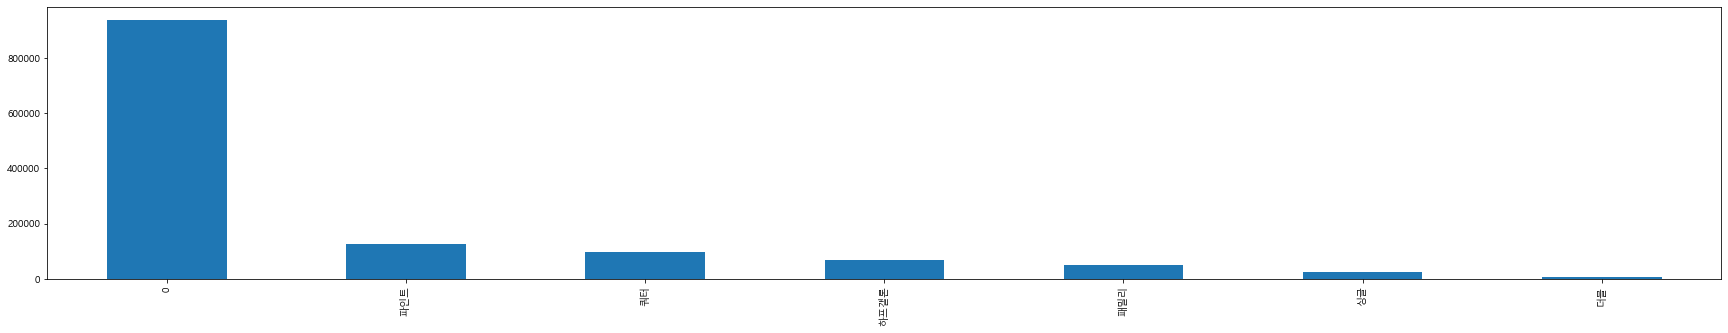

ITEM_TYPE1: 
0       937555
파인트     127287
쿼터       95344
하프갤론     68814
패밀리      49104
싱글       23428
더블        7854
Name: ITEM_TYPE1, dtype: int64


In [44]:
# 케이크를 구매한 고객의 상품 선택
bar_plot_2('ITEM_TYPE1')

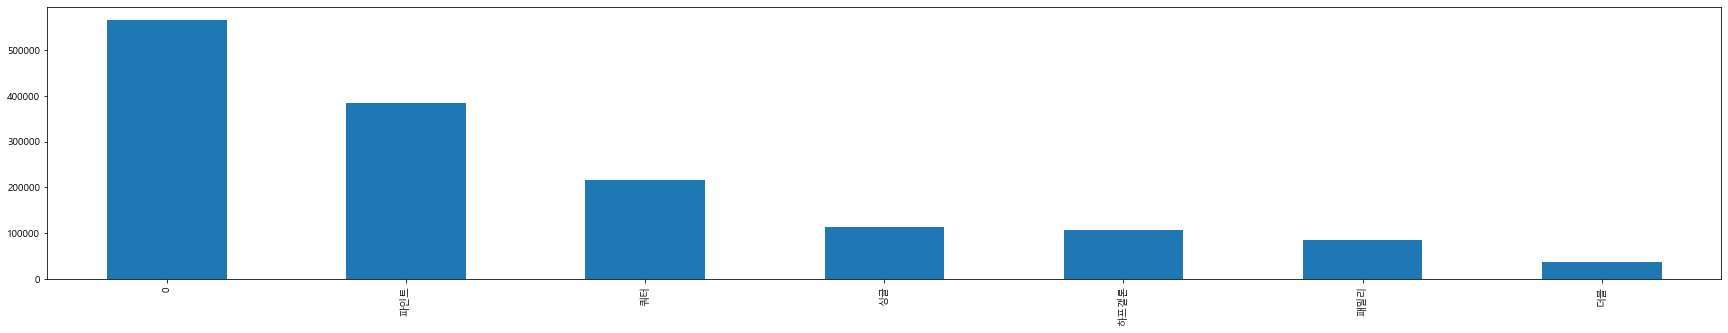

ITEM_TYPE1: 
0       566232
파인트     385024
쿼터      216193
싱글      112320
하프갤론    106852
패밀리      85809
더블       36528
Name: ITEM_TYPE1, dtype: int64


In [45]:
# 케이크를 구매하지 않은 고객의 상품 선택
bar_plot_3('ITEM_TYPE1') 

케익 구매한 사람은 케익외의 기타제품 구매가 매우 높음, 쿼터, 패밀리를 구매하는 사람이 케익구매로 연결될 확률이 높았음, <br>
싱글/더블은 케익구매 낮은 것 확인

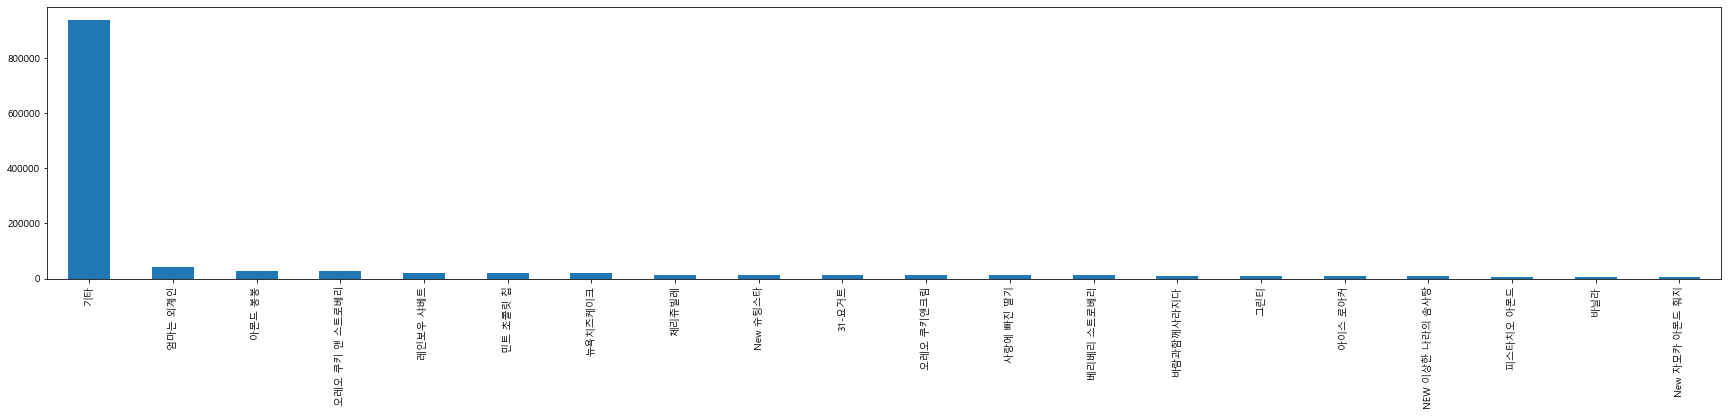

ITEM_NM_x: 
기타                 937555
엄마는 외계인             43610
아몬드 봉봉              29191
오레오 쿠키 앤 스트로베리      26162
레인보우 샤베트            21237
민트 초콜릿 칩            19969
뉴욕치즈케이크             19301
체리쥬빌레               14595
New 슈팅스타            14311
31-요거트              13908
오레오 쿠키앤크림           13452
사랑에 빠진 딸기           12774
베리베리 스트로베리          11506
바람과함께사라지다           11051
그린티                 10592
아이스 로아커              9351
NEW 이상한 나라의 솜사탕      8629
피스타치오 아몬드            6931
바닐라                  6580
New 자모카 아몬드 훠지       6376
Name: ITEM_NM_x, dtype: int64


In [46]:
# 케익 구매를 한 고객의 Flavor 선택
bar_plot_2('ITEM_NM_x')

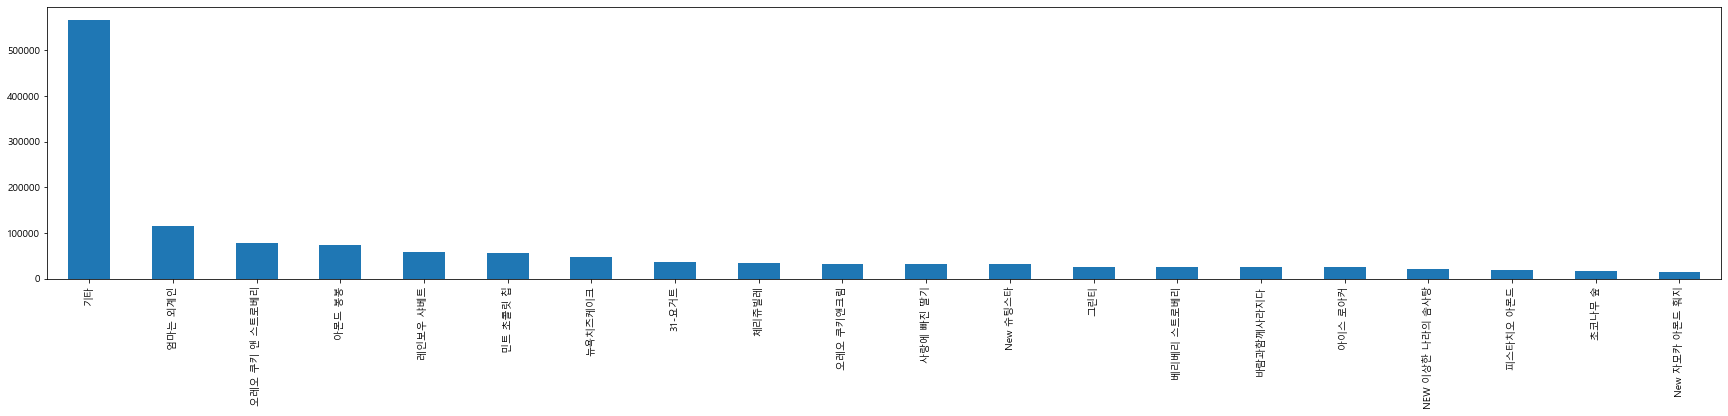

ITEM_NM_x: 
기타                 566232
엄마는 외계인            115182
오레오 쿠키 앤 스트로베리      77090
아몬드 봉봉              74622
레인보우 샤베트            57560
민트 초콜릿 칩            57247
뉴욕치즈케이크             46413
31-요거트              36614
체리쥬빌레               35028
오레오 쿠키앤크림           31408
사랑에 빠진 딸기           31333
New 슈팅스타            31249
그린티                 26429
베리베리 스트로베리          26008
바람과함께사라지다           25973
아이스 로아커             25001
NEW 이상한 나라의 솜사탕     20342
피스타치오 아몬드           18243
초코나무 숲              16551
New 자모카 아몬드 훠지      14949
Name: ITEM_NM_x, dtype: int64


In [47]:
# 케익구매를 하지 않은 고객의 Flavor 선택
bar_plot_3('ITEM_NM_x') 

플레이버 선택에서는 눈에 띄는 결과 없었음

사이즈 별 플레이버 선택

In [48]:
df_types = df_modi.groupby(['ITEM_TYPE1','ITEM_NM_x'], as_index=False).agg({'SUM(TSD.SALE_QTY)':sum,'SUM(TSD.SALE_AMT)':sum}).sort_values(['ITEM_TYPE1','SUM(TSD.SALE_QTY)'],ascending=False)
df_types

,ITEM_TYPE1,ITEM_NM_x,SUM(TSD.SALE_QTY),SUM(TSD.SALE_AMT)
575,하프갤론,엄마는 외계인,27230,789670000
566,하프갤론,아몬드 봉봉,20553,596032000
579,하프갤론,오레오 쿠키 앤 스트로베리,15044,436276000
533,하프갤론,뉴욕치즈케이크,13852,401703000
539,하프갤론,레인보우 샤베트,13117,380393000
...,...,...,...,...
85,더블,초콜릿칩 포레스트 오가닉,1,5100
91,더블,트로피칼 옐로우 오가닉,1,5100
98,더블,피에스타아몬드 오가닉,1,5100
100,더블,핑크 스타,1,4700


## 제품 타입 별 Flavor선택

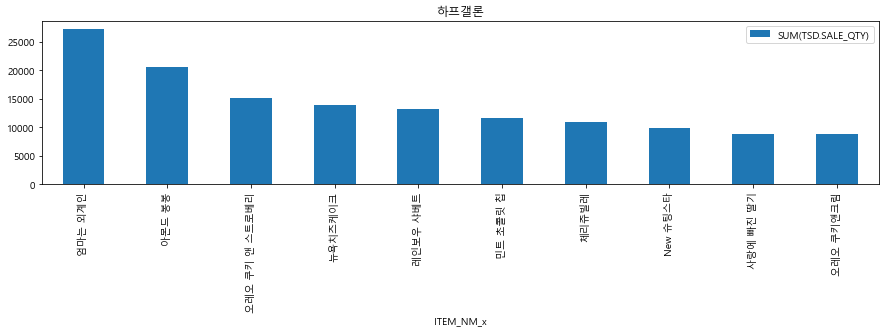

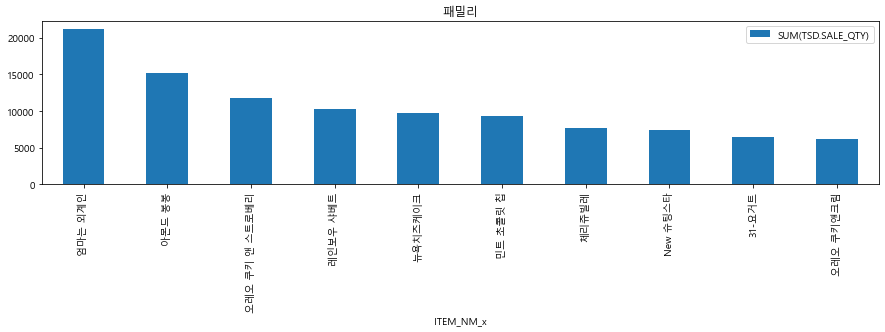

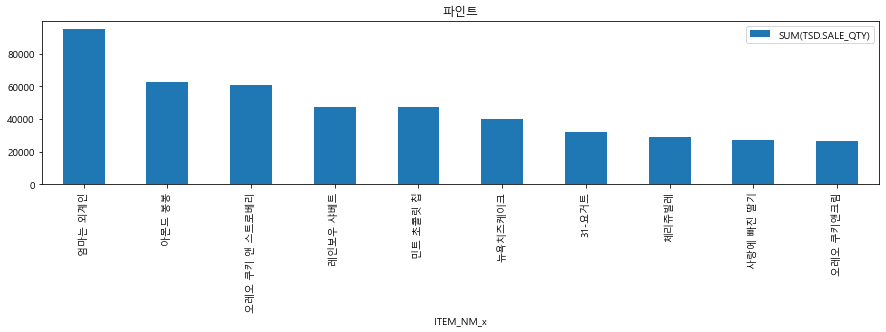

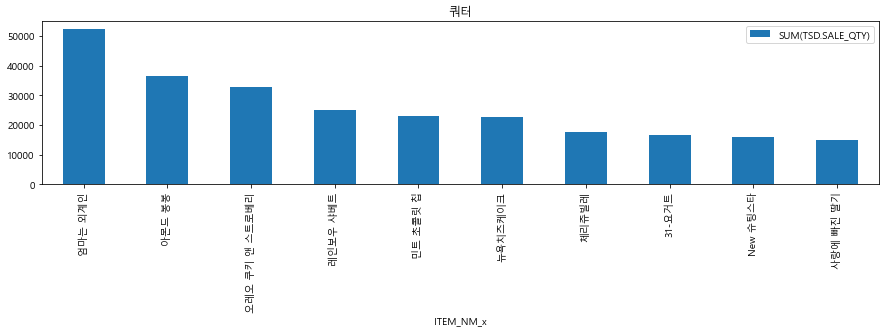

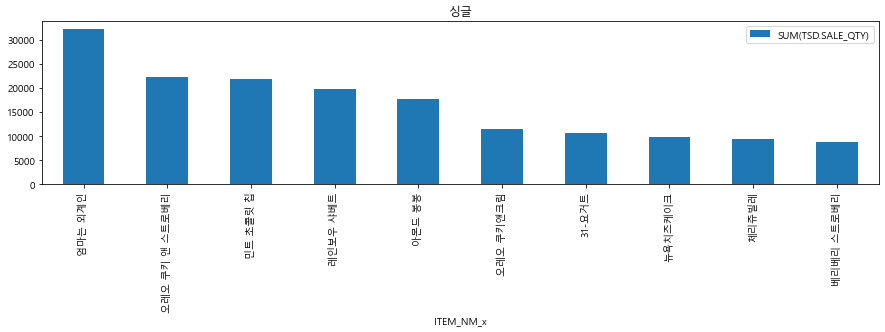

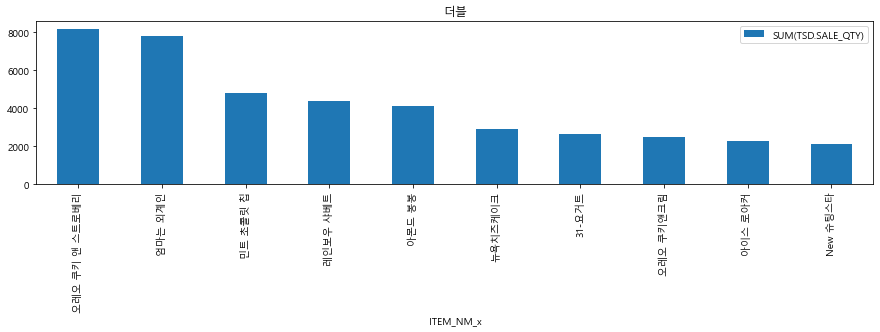

In [49]:
for idx, x in enumerate(df_types['ITEM_TYPE1'].unique()[:-1]):
    df_types[df_types['ITEM_TYPE1']==x][:10].plot.bar(x='ITEM_NM_x',y='SUM(TSD.SALE_QTY)', title = x, figsize=(15,3))      

파인트, 싱글, 더블의 경우 시즌성/신제품 성 제품의 편중이 나머지에 비해 더 큰 것 확인

,SALES_ORG_CD,HPC_CUST_CD,BUY_DT,STOR_CD,STORE_NM,TRADE_NO,RNUM,ITEM_CD,ITEM_NM,ITEM_CD_LIST
0,3000,1000062916,20220301,62017,신월사거리,5,1,N86342,블록팩 (쿠키앤크림),N86342
1,3000,1000063086,20220301,62022,고덕래미안힐스,2,1,N61300,레디팩(순수(秀) 우유),N61300
2,3000,1000063086,20220301,62022,고덕래미안힐스,2,2,N89940,레디팩 (아몬드 봉봉),N89940
3,3000,1000064657,20220301,42882,부산동대신,11,1,N80009,파인트,"N80009,A50632,A50607,A50438"
4,3000,1000066637,20220301,72043,청주지웰,44,1,N80003,싱글레귤러컵,"N80003,A50842"
...,...,...,...,...,...,...,...,...,...,...
1156474,3000,1036787867,20220319,72061,전주효천,45,3,N89858,아빵 우유,N89858
1156475,3000,1036787867,20220319,72061,전주효천,45,4,N89911,아이스호떡,N89911
1156476,3000,1036787867,20220319,72061,전주효천,45,5,N61437,아이스모찌오레오쿠키앤스트로베리,N61437
1156477,3000,1036787867,20220319,72061,전주효천,45,6,N61306,아이스크림 콘 아몬드 봉봉,N61306


# 해피스테이션 데이터

In [1]:
import pandas as pd
df_nhs = pd.read_csv('sample2.csv', encoding='euckr')
df_nhs

,SALES_ORG_CD,HPC_CUST_CD,BUY_DT,STOR_CD,STORE_NM,TRADE_NO,RNUM,ITEM_CD,ITEM_NM,ITEM_CD_LIST
0,3000,1000062916,20220301,62017,신월사거리,5,1,N86342,블록팩 (쿠키앤크림),N86342
1,3000,1000063086,20220301,62022,고덕래미안힐스,2,1,N61300,레디팩(순수(秀) 우유),N61300
2,3000,1000063086,20220301,62022,고덕래미안힐스,2,2,N89940,레디팩 (아몬드 봉봉),N89940
3,3000,1000064657,20220301,42882,부산동대신,11,1,N80009,파인트,"N80009,A50632,A50607,A50438"
4,3000,1000066637,20220301,72043,청주지웰,44,1,N80003,싱글레귤러컵,"N80003,A50842"
...,...,...,...,...,...,...,...,...,...,...
1156474,3000,1036787867,20220319,72061,전주효천,45,3,N89858,아빵 우유,N89858
1156475,3000,1036787867,20220319,72061,전주효천,45,4,N89911,아이스호떡,N89911
1156476,3000,1036787867,20220319,72061,전주효천,45,5,N61437,아이스모찌오레오쿠키앤스트로베리,N61437
1156477,3000,1036787867,20220319,72061,전주효천,45,6,N61306,아이스크림 콘 아몬드 봉봉,N61306


In [53]:
df_nhs.ITEM_NM.unique()

array(['블록팩 (쿠키앤크림)', '레디팩(순수(秀) 우유)', '레디팩 (아몬드 봉봉)', '파인트', '싱글레귤러컵',
       '61_골라먹는 와츄원(L2)', '패밀리', '(R)유니콘블라스트[5.1]', '쿼터', '레디팩(로투스 비스코프)',
       '레디팩 (뉴욕 치즈 케이크)', '레디팩(피스타치오 아몬드)', '컵_이달의맛더블주니어', '싱글킹컵',
       '(L)와츄원쉐이크NEWBI[6.2]', '딸기연유라떼[5.1]', '38_스마일 스노우 블러섬(L1)',
       '더블주니어컵', '레몬라임블라스트[4.5]', '버라이어티팩', '37_시크릿 어피치(L2)',
       'KT VVIP 쿼터무료', 'KT더블할인_파인트', '미니 아이스 마카롱세트', '아이스 모찌 스트로베리',
       '(R)오레오딸기크림쿠키쉐이크[5.4]', '카페라떼(H)[3.3]', '(R)와츄원쉐이크[5.4]',
       '(L)와츄원쉐이크[6.2]', '카페라떼(I)[3.3]', '49_바로먹는 와츄원 (L1)',
       '아메리카노(H)[2.8]', '아이스모찌 소금우유', '아이스모찌오레오쿠키앤스트로베리',
       '블록팩(이상한나라의솜사탕)', '블록팩(민트초코봉봉)', '롤(초코)', '스틱바 초코그린티',
       '블록팩(체리쥬빌레)', '블록팩 (뉴욕치즈케이크)', '블록팩(바람과함께사라지다)',
       '(355ml)펩시콜라[1.5]', '(L)(H)블랙웨일 카페라떼[3.9]', '(L)(H)스칼렛 카페라떼[3.9]',
       '23_나눠먹는 와츄원(L2)', '카페31_민초모카라떼[5.5]', '하프갤론', '캐릭터 토이컵 (루피)',
       '블록팩(31밀크)', '유자캐모마일티(I)', '(R)와츄원쉐이크NEWBI[5.4]', '싱글킹콘',
       '45_달콤한 선물상자(L2)', '53_듀얼 와츄원 NO.9 (L4)', '82_바로먹는 와츄원(M1)',
       '더

In [2]:
df_nhs['TRADE_CD'] = df_nhs.STOR_CD.apply(lambda x: str(x)) + df_nhs.BUY_DT.apply(lambda x: str(x)[-6:]) +  df_nhs.TRADE_NO.apply(lambda x: str(x).rjust(4,"0"))
df_nhs.sort_values('TRADE_CD', ascending =True)

,SALES_ORG_CD,HPC_CUST_CD,BUY_DT,STOR_CD,STORE_NM,TRADE_NO,RNUM,ITEM_CD,ITEM_NM,ITEM_CD_LIST,TRADE_CD
900463,3000,1052037493,20220301,11081,청량리역사,3,1,N85582,블록팩(체리쥬빌레),N85582,110812203010003
7540,3000,1000405883,20220301,11081,청량리역사,4,1,N89322,81_리얼 27 큐브,N89322,110812203010004
780552,3000,1036583402,20220301,11081,청량리역사,5,1,N80009,파인트,"N80009,A56077,A56035,A51940",110812203010005
780453,3000,1011994933,20220301,11081,청량리역사,6,1,N86477,아메리카노(I)[2.8],N86477,110812203010006
263579,3000,1002514862,20220301,11081,청량리역사,9,1,N80003,싱글레귤러컵,"N80003,A50410",110812203010009
...,...,...,...,...,...,...,...,...,...,...,...
1029225,3000,1006789860,20220331,74150,센텀홈플러스,10,1,N80012,하프갤론,"N80012,A56091,A56088,A56069,A56005,A52342,A52311",741502203310010
1042519,3000,1054882192,20220331,74150,센텀홈플러스,11,1,N80012,하프갤론,"N80012,A56091,A56089,A56087,A56069,A51940,A50632",741502203310011
1030661,3000,1011003393,20220331,74150,센텀홈플러스,13,1,N80012,하프갤론,"N80012,A56084,A56035,A52311,A50438,A50410,A50111",741502203310013
345463,3000,1001843816,20220331,74150,센텀홈플러스,14,1,N60900,18_골라먹는 와츄원(L2),N60900,741502203310014


In [3]:
print(f"점포 당 일 영수증 건수 : {(len(df_nhs.TRADE_CD.unique())/len(df_nhs.STORE_NM.unique())/30) :0.1f}개")

점포 당 일 영수증 건수 : 19.0개


In [69]:
len(df_nhs.TRADE_CD.unique())/len(df.TRADE_CD.unique())# 전체거래 중 비중

0.40861033140727104

In [4]:
len(df_nhs.STORE_NM.unique()) # 적용 매장수

1276

In [5]:
sales = df_nhs.ITEM_CD_LIST.str.split(',')
cd = list(set(w for sale in sales for w in sale)) # 전체코드 (IDF용)
cd.sort()

In [19]:
df_nhs.loc

,SALES_ORG_CD,HPC_CUST_CD,BUY_DT,STOR_CD,STORE_NM,TRADE_NO,RNUM,ITEM_CD,ITEM_NM,ITEM_CD_LIST,TRADE_CD
0,3000,1000062916,20220301,62017,신월사거리,5,1,N86342,블록팩 (쿠키앤크림),N86342,620172203010005
1,3000,1000063086,20220301,62022,고덕래미안힐스,2,1,N61300,레디팩(순수(秀) 우유),N61300,620222203010002
2,3000,1000063086,20220301,62022,고덕래미안힐스,2,2,N89940,레디팩 (아몬드 봉봉),N89940,620222203010002
3,3000,1000064657,20220301,42882,부산동대신,11,1,N80009,파인트,"N80009,A50632,A50607,A50438",428822203010011
4,3000,1000066637,20220301,72043,청주지웰,44,1,N80003,싱글레귤러컵,"N80003,A50842",720432203010044
...,...,...,...,...,...,...,...,...,...,...,...
1156474,3000,1036787867,20220319,72061,전주효천,45,3,N89858,아빵 우유,N89858,720612203190045
1156475,3000,1036787867,20220319,72061,전주효천,45,4,N89911,아이스호떡,N89911,720612203190045
1156476,3000,1036787867,20220319,72061,전주효천,45,5,N61437,아이스모찌오레오쿠키앤스트로베리,N61437,720612203190045
1156477,3000,1036787867,20220319,72061,전주효천,45,6,N61306,아이스크림 콘 아몬드 봉봉,N61306,720612203190045


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
product = df_nhs.ITEM_CD_LIST

tfidf_vectorizer = TfidfVectorizer()
# 문장 벡터화 진행
tfidf_matrix = tfidf_vectorizer.fit_transform(product)
# 각 단어
text = tfidf_vectorizer.get_feature_names()
# 각 단어의 벡터 값
idf = tfidf_vectorizer.idf_

C:\dev\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
print(dict(zip(text, idf)))

{'a50107': 11.742015642077746, 'a50111': 3.185017292944612, 'a50112': 5.336390568494375, 'a50134': 7.8396390137014045, 'a50135': 4.255693851246917, 'a50143': 12.763666889609727, 'a50172': 11.349973554301721, 'a50362': 7.466461251914381, 'a50382': 7.391479674495234, 'a50410': 3.578895069302116, 'a50436': 8.613502257289936, 'a50438': 3.901435083382363, 'a50554': 3.383377482088105, 'a50594': 7.776262314228632, 'a50600': 6.485771051951616, 'a50607': 3.928052290829685, 'a50616': 11.742015642077746, 'a50625': 10.22469301855145, 'a50632': 5.1883671789286305, 'a50645': 11.965159193391955, 'a50649': 4.470200753046115, 'a50679': 4.659164851393394, 'a50685': 5.495753849853759, 'a50751': 10.77123672491952, 'a50802': 10.542050859149349, 'a50825': 10.712396224896587, 'a50842': 3.1429770611034433, 'a51010': 9.77910791665386, 'a51068': 10.386180488442564, 'a51080': 9.854945993045366, 'a51122': 9.735144793232745, 'a51516': 10.900448456399527, 'a51521': 10.26041110115353, 'a51872': 3.8502511714522574, '

In [8]:
# N = len(sales) # 총판매건수

# def tf(t, d):
#     return d.count(t)

# def idf(t):
#     df = 0
#     for sale in sales:
#         df += t in doc
#     return log(N/(df+1))

# def tfidf(t, d):
#     return tf(t,d)* idf(t)

In [ ]:
# result = []

# # 각 문서에 대해서 아래 연산을 반복
# for i in range(N):
#     result.append([])
#     d = sales[i]
#     for j in range(len(cd)):
#         t = cd[j]
#         result[-1].append(tf(t, d))

# tf_ = pd.DataFrame(result, columns = cd)

In [ ]:
# result = []

# for j in range(len(cd)):
#     t = cd[j]
#     result.append(idf(t))

# idf_ = pd.DataFrame(result, index=cd, columns=["IDF"])
# idf_

In [ ]:
# result = []
# for i in range(N):
#     result.append([])
#     d = sales[i]
#     for j in range(len(cd)):
#         t = cd[j]
#         result[-1].append(tfidf(t,d))

# tfidf_ = pd.DataFrame(result, columns = cd)
# tfidf_

In [1]:
import pandas as pd 

pd.read_csv('https://raw.githubusercontent.com/happiness96/Web-Crawling/master/crawling/DTM.csv',index_col=0)

,가공,가동,가루,가상,가성,가속,가수분해,가스,가압,가연,...,흑연,흔적,흡수,흡습성,흡열반응,흡입,흡착,흰색,히드로,히드록시
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
